In [36]:
%%capture captured
#!for PHENO in 'hair_black' 'hair_brown' 'hair_blonde'; do plink2 --bfile imputed/opensnp_hm3 \
#!for PHENO in 'simutrait_cc'; do plink2 --bfile imputed/opensnp_hm3 \
!for PHENO in 'simutrait_cc_chr2122'; do plink2 --bfile imputed/opensnp_hm3 --chr 20-22 \
--pheno qc/pheno.csv --pheno-name $PHENO \
--covar qc/pheno.csv --covar-name sex batch PC1-PC10 --covar-variance-standardize \
--glm omit-ref hide-covar firth-fallback --1 --out gwas/opensnp_hm3; done

#!for PHENO in 'height_cm'; do plink2 --bfile imputed/opensnp_hm3 \
#!for PHENO in 'simutrait1' 'simutrait2'; do plink2 --bfile imputed/opensnp_hm3 \
!for PHENO in 'simutrait1_chr2122' 'simutrait2_chr2122'; do plink2 --bfile imputed/opensnp_hm3 --chr 20-22 \
--pheno qc/pheno.csv --pheno-name $PHENO \
--covar qc/pheno.csv --covar-name sex batch PC1-PC10 --covar-variance-standardize \
--glm omit-ref hide-covar  --out gwas/opensnp_hm3; done


In [1]:
!gzip gwas/*.glm.logistic.hybrid
!gzip gwas/*.glm.linear

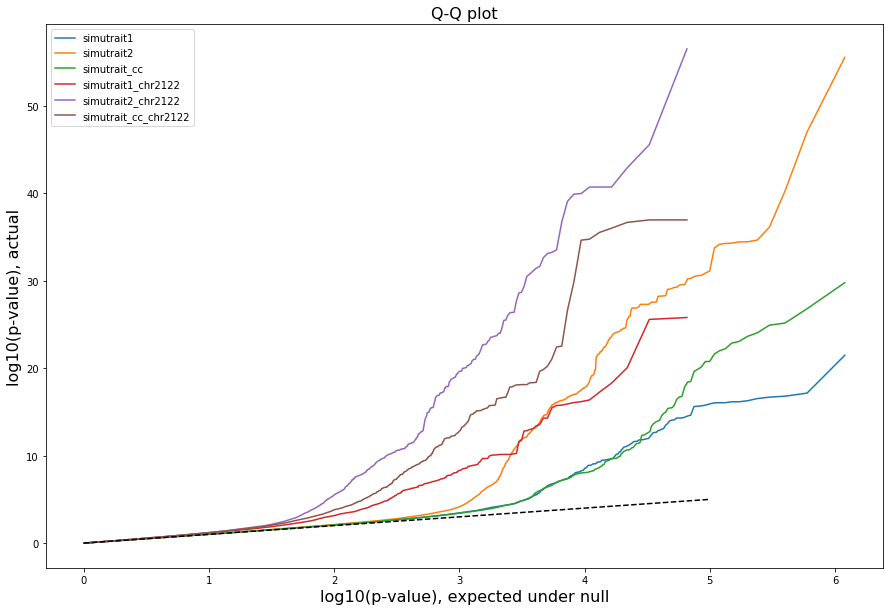

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

df_simutrait1=pd.read_csv(f'gwas/opensnp_hm3.simutrait1.glm.linear.gz', sep='\t')
df_simutrait2=pd.read_csv(f'gwas/opensnp_hm3.simutrait2.glm.linear.gz', sep='\t')
df_simutrait_cc=pd.read_csv(f'gwas/opensnp_hm3.simutrait_cc.glm.logistic.hybrid.gz', sep='\t')

df_simutrait1_chr2122=pd.read_csv(f'gwas/opensnp_hm3.simutrait1_chr2122.glm.linear.gz', sep='\t')
df_simutrait2_chr2122=pd.read_csv(f'gwas/opensnp_hm3.simutrait2_chr2122.glm.linear.gz', sep='\t')
df_simutrait_cc_chr2122=pd.read_csv(f'gwas/opensnp_hm3.simutrait_cc_chr2122.glm.logistic.hybrid.gz', sep='\t')

for df, trait in [(df_simutrait1, 'simutrait1'), (df_simutrait2, 'simutrait2'), (df_simutrait_cc, 'simutrait_cc')]:
    df=df[~df['P'].isnull()]
    plt.plot(-np.log10(np.array(range(1,1+len(df)))/len(df)),    
            -np.log10(sorted(df['P'].values)), label=trait)

for df, trait in [(df_simutrait1_chr2122, 'simutrait1_chr2122'), (df_simutrait2_chr2122, 'simutrait2_chr2122'), (df_simutrait_cc_chr2122, 'simutrait_cc_chr2122')]:
    df=df[~df['P'].isnull()]
    plt.plot(-np.log10(np.array(range(1,1+len(df)))/len(df)),    
            -np.log10(sorted(df['P'].values)), label=trait)
plt.plot([0, 5], [0, 5], 'k--')
plt.legend()
plt.title(f'Q-Q plot', fontsize=16);
plt.xlabel('log10(p-value), expected under null', fontsize=16);
plt.ylabel('log10(p-value), actual', fontsize=16);


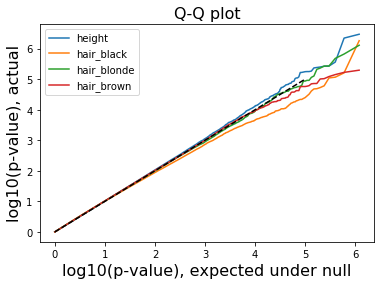

In [3]:
df_height=pd.read_csv(f'gwas/opensnp_hm3.height_cm.glm.linear.gz', sep='\t')
df_black=pd.read_csv(f'gwas/opensnp_hm3.hair_black.glm.logistic.hybrid.gz', sep='\t')
df_blonde=pd.read_csv(f'gwas/opensnp_hm3.hair_blonde.glm.logistic.hybrid.gz', sep='\t')
df_brown=pd.read_csv(f'gwas/opensnp_hm3.hair_brown.glm.logistic.hybrid.gz', sep='\t')

for df, trait in [(df_height, 'height'), (df_black, 'hair_black'), (df_blonde, 'hair_blonde'), (df_brown, 'hair_brown')]:
    df=df[~df['P'].isnull()]
    plt.plot(-np.log10(np.array(range(1,1+len(df)))/len(df)),    
            -np.log10(sorted(df['P'].values)), label=trait)

plt.plot([0, 5], [0, 5], 'k--')
plt.legend()
plt.title(f'Q-Q plot', fontsize=16);
plt.xlabel('log10(p-value), expected under null', fontsize=16);
plt.ylabel('log10(p-value), actual', fontsize=16);
